In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cleanedData_20210804.csv', index_col=0, encoding='utf-8')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,6,12,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,car_address,car_title,car_photo,dealer_name,dealer_address,sunroof,TPMS,SRS,keyless,ESP,ABS,cruise_sys,HID_head,isofix,electric_seat,auto_AC,navi_sys,IVI_sys,leather_seat,parking_radar,parking_camera,BSM,LDW,source,car_door,car_seat,theft_alarm,central_lock,TCS,LED_head,SW_button,ACC
0,236581,TOYOTA,ALTIS,2009.0,197710.0,196000,黑,1800.0,2.0,汽油,手自排,1,高雄市,豐田ALTIS 1800cc 2009年 黑色0頭款可全貸,https://www.hotcar.com.tw/UPLOAD/CW/HF1002/260...,上暘汽車,高雄市鳥松區神農路856號,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,236578,MITSUBISHI,DELICA,2016.0,81609.0,358000,深藍,2400.0,2.0,汽油,手排,1,高雄市,三菱得利卡2400cc 2016年框式附加吊桿0頭款可全貸,https://www.hotcar.com.tw/UPLOAD/CW/HF1002/260...,上暘汽車,高雄市鳥松區神農路856號,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,236571,SUZUKI,CARRY,2013.0,53167.0,286000,銀,1600.0,2.0,汽油,手排,1,高雄市,鈴木吉利 1590cc 2013年銀色0頭款可全貸,https://www.hotcar.com.tw/UPLOAD/CW/HF1002/260...,上暘汽車,高雄市鳥松區神農路856號,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,236495,NISSAN,MARCH,2013.0,92757.0,238000,淺綠,1500.0,2.0,汽油,自排,1,台中市,新手駕駛首選 顯眼 小台 好停車 好照顧,https://www.hotcar.com.tw/UPLOAD/CW/HD1076/260...,聖傑汽車(烏日店),台中市烏日區中山路三段903號,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,236493,NISSAN,SENTRA,2015.0,43307.0,378000,白,1800.0,2.0,汽油,手自排,1,台中市,Aero 旗艦版 電動座椅調整 4安 多合一影音,https://www.hotcar.com.tw/UPLOAD/CW/HD1076/260...,聖傑汽車(烏日店),台中市烏日區中山路三段903號,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85510 entries, 0 to 749
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  85510 non-null  object 
 1   car_brand           85431 non-null  object 
 2   car_model           85417 non-null  object 
 3   car_year            85431 non-null  float64
 4   car_mileage         83319 non-null  float64
 5   car_price           85510 non-null  object 
 6   car_color           83487 non-null  object 
 7   car_cylinderVolume  85431 non-null  float64
 8   car_driveMode       79628 non-null  float64
 9   car_fuel            78764 non-null  object 
 10  car_gear            85076 non-null  object 
 11  verified            79807 non-null  object 
 12  car_address         82238 non-null  object 
 13  car_title           84269 non-null  object 
 14  car_photo           77042 non-null  object 
 15  dealer_name         85431 non-null  object 
 16  dealer

In [5]:
df.describe()

,car_year,car_mileage,car_cylinderVolume,car_driveMode,sunroof,TPMS,SRS,keyless,ESP,ABS,cruise_sys,HID_head,isofix,electric_seat,auto_AC,navi_sys,IVI_sys,leather_seat,parking_radar,parking_camera,BSM,LDW,car_door,car_seat,theft_alarm,central_lock,TCS,LED_head,SW_button,ACC
count,85431.000000,8.331900e+04,8.543100e+04,79628.000000,81382.000000,78164.000000,85431.000000,81382.000000,50882.000000,84682.000000,78913.000000,20434.000000,48397.000000,49296.000000,85431.000000,81382.000000,81382.000000,80633.000000,53351.000000,78913.000000,44498.000000,42762.000000,45341.000000,71512.000000,42130.000000,42130.000000,72646.000000,45364.000000,69412.000000,10949.000000
mean,2013.348492,2.071478e+05,2.377541e+03,2.267670,0.437443,0.550573,0.750653,0.496031,0.515506,0.780071,0.636765,0.192865,0.603385,0.422448,0.710784,0.529933,0.571896,0.741644,0.765122,0.643785,0.261922,0.235373,4.395845,5.022024,0.795680,0.835367,0.652782,0.451768,0.682951,0.058361
std,4.509133,1.301508e+07,9.929318e+04,0.680954,0.496074,0.497439,0.432638,0.499987,0.499764,0.414201,0.480935,0.394557,0.489200,0.493954,0.453401,0.499106,0.494807,0.437733,0.423927,0.478883,0.439685,0.424236,0.847573,0.857808,0.403209,0.370854,0.476089,0.497674,0.465330,0.234436
min,1967.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.597150e+04,1.600000e+03,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,8.020600e+04,2.000000e+03,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,2017.000000,1.300000e+05,2.100000e+03,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2022.000000,2.147484e+09,2.902180e+07,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# 看是否有空值
df.isnull().any()

id                    False
car_brand              True
car_model              True
car_year               True
car_mileage            True
car_price             False
car_color              True
car_cylinderVolume     True
car_driveMode          True
car_fuel               True
car_gear               True
verified               True
car_address            True
car_title              True
car_photo              True
dealer_name            True
dealer_address         True
sunroof                True
TPMS                   True
SRS                    True
keyless                True
ESP                    True
ABS                    True
cruise_sys             True
HID_head               True
isofix                 True
electric_seat          True
auto_AC                True
navi_sys               True
IVI_sys                True
leather_seat           True
parking_radar          True
parking_camera         True
BSM                    True
LDW                    True
source              

In [7]:
# clean data & change data type
df['car_price'] = df['car_price'].astype(str)
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = pd.to_numeric(df['car_price'])
df['car_driveMode'] = df['car_driveMode'].astype(str)
df.loc[df['verified'].str.contains('[a-zA-Z]') == True, 'verified'] = 0
df.iloc[:,17:] = df.iloc[:,17:].astype(str)

In [8]:
#delete the data that price<=10000
indexNames = df[df['car_price']<=10000].index
df.drop(indexNames , inplace=True)
df.shape

(85363, 44)

In [9]:
#delete the data that price>8000000
df = df[df['car_price']<=8000000]
df.shape

(85217, 44)

In [10]:
#刪除空值
df = df.dropna(subset=['car_brand'])
df = df.dropna(subset=['car_model'])

# 空值用眾數填充
df_fill = df.copy()
df_fill['car_color'] = df_fill['car_color'].fillna(df_fill['car_color'].mode()[0])
df_fill['car_driveMode'] = df_fill['car_driveMode'].fillna(df_fill['car_driveMode'].mode()[0])
df_fill['car_fuel'] = df_fill['car_fuel'].fillna(df_fill['car_fuel'].mode()[0])
df_fill['car_gear'] = df_fill['car_gear'].fillna(df_fill['car_gear'].mode()[0])
df_fill['verified'] = df_fill['verified'].fillna(df_fill['verified'].mode()[0])
df_fill['car_door'] = df_fill['car_door'].fillna(df_fill['car_door'].mode()[0])
df_fill['car_seat'] = df_fill['car_seat'].fillna(df_fill['car_seat'].mode()[0])
df_fill['car_mileage'] = df_fill['car_mileage'].fillna(df_fill['car_mileage'].median())

In [11]:
# 看是否有空值
df_fill.isnull().any()

id                    False
car_brand             False
car_model             False
car_year              False
car_mileage           False
car_price             False
car_color             False
car_cylinderVolume    False
car_driveMode         False
car_fuel              False
car_gear              False
verified              False
car_address            True
car_title              True
car_photo              True
dealer_name           False
dealer_address         True
sunroof               False
TPMS                  False
SRS                   False
keyless               False
ESP                   False
ABS                   False
cruise_sys            False
HID_head              False
isofix                False
electric_seat         False
auto_AC               False
navi_sys              False
IVI_sys               False
leather_seat          False
parking_radar         False
parking_camera        False
BSM                   False
LDW                   False
source              

In [12]:
#normalize the data
#不確定car_driveMode	car_door	car_seat要不要被normalize(有次序之分?)
from sklearn import preprocessing
df_new = df_fill.copy()
df_new['car_year'] = preprocessing.scale(df_new['car_year'])
df_new['car_mileage'] = preprocessing.scale(df_new['car_mileage'])
df_new['car_cylinderVolume'] = preprocessing.scale(df_new['car_cylinderVolume'])
df_new['car_driveMode'] = preprocessing.scale(df_new['car_driveMode'])
df_new['car_door'] = preprocessing.scale(df_new['car_door'])
df_new['car_seat'] = preprocessing.scale(df_new['car_seat'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


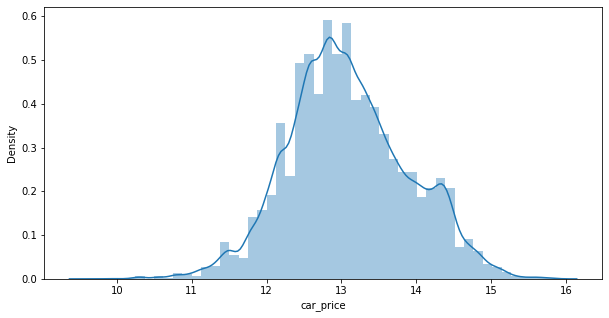

In [13]:
target = np.log(df_new['car_price'])
plt.figure(figsize = (10,5))
sns.distplot(target)
df_new['car_price'] = target

In [14]:
#刪除不需要的欄位
df2 = df_new.drop(['source', 'id', 'car_title', 'car_photo', 'dealer_name', 'dealer_address', 'car_address'], axis=1)
df2.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,sunroof,TPMS,SRS,keyless,ESP,ABS,cruise_sys,HID_head,isofix,electric_seat,auto_AC,navi_sys,IVI_sys,leather_seat,parking_radar,parking_camera,BSM,LDW,car_door,car_seat,theft_alarm,central_lock,TCS,LED_head,SW_button,ACC
0,TOYOTA,ALTIS,-0.963289,-0.000530,12.185870,黑,-0.005802,-0.391966,汽油,手自排,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,nan,nan,nan,nan,nan,nan
1,MITSUBISHI,DELICA,0.589285,-0.009547,12.788288,深藍,0.000230,-0.391966,汽油,手排,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,nan,nan,nan,nan,nan,nan
2,SUZUKI,CARRY,-0.076103,-0.011756,12.563747,銀,-0.007812,-0.391966,汽油,手排,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,nan,nan,nan,nan,nan,nan
3,NISSAN,MARCH,-0.076103,-0.008681,12.380026,淺綠,-0.008818,-0.391966,汽油,自排,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,nan,nan,nan,nan,nan,nan
4,NISSAN,SENTRA,0.367489,-0.012521,12.842649,白,-0.005802,-0.391966,汽油,手自排,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,nan,nan,nan,nan,nan,nan


In [15]:
# 看是否有空值
df2.isnull().any()

car_brand             False
car_model             False
car_year              False
car_mileage           False
car_price             False
car_color             False
car_cylinderVolume    False
car_driveMode          True
car_fuel              False
car_gear              False
verified              False
sunroof               False
TPMS                  False
SRS                   False
keyless               False
ESP                   False
ABS                   False
cruise_sys            False
HID_head              False
isofix                False
electric_seat         False
auto_AC               False
navi_sys              False
IVI_sys               False
leather_seat          False
parking_radar         False
parking_camera        False
BSM                   False
LDW                   False
car_door               True
car_seat               True
theft_alarm           False
central_lock          False
TCS                   False
LED_head              False
SW_button           

In [16]:
# 空值用眾數填充
df2['car_driveMode'] = df2['car_driveMode'].fillna(df2['car_driveMode'].mode()[0])
df2['car_door'] = df2['car_door'].fillna(df2['car_door'].mode()[0])
df2['car_seat'] = df2['car_seat'].fillna(df2['car_seat'].mode()[0])

In [17]:
df_dummy = pd.get_dummies(df2)
df_dummy.head()

,car_year,car_mileage,car_price,car_cylinderVolume,car_driveMode,car_door,car_seat,car_brand_ACURA,car_brand_ALFA ROMEO,car_brand_ALFAROMEO,car_brand_ASIA,car_brand_ASTON MARTIN,car_brand_AUDI,car_brand_AUSTIN,car_brand_BENTLEY,car_brand_BENZ,car_brand_BMW,car_brand_BUICK,car_brand_CADILLAC,car_brand_CHEVROLET,car_brand_CHRYSLER,car_brand_CITROEN,car_brand_CMC,car_brand_DAIHATSU,car_brand_DFSK,car_brand_DODGE,car_brand_FERRARI,car_brand_FIAT,car_brand_FORD,car_brand_FORMOSA,car_brand_FOTON,car_brand_HINO,car_brand_HONDA,car_brand_HUMMER,car_brand_HYUNDAI,car_brand_INFINITI,car_brand_ISUZU,car_brand_IVECO,car_brand_JAGUAR,car_brand_JEEP,...,auto_AC_1.0,navi_sys_0.0,navi_sys_1.0,navi_sys_nan,IVI_sys_0.0,IVI_sys_1.0,IVI_sys_nan,leather_seat_0.0,leather_seat_1.0,leather_seat_nan,parking_radar_0.0,parking_radar_1.0,parking_radar_nan,parking_camera_0.0,parking_camera_1.0,parking_camera_nan,BSM_0.0,BSM_1.0,BSM_nan,LDW_0.0,LDW_1.0,LDW_nan,theft_alarm_0.0,theft_alarm_1.0,theft_alarm_nan,central_lock_0.0,central_lock_1.0,central_lock_nan,TCS_0.0,TCS_1.0,TCS_nan,LED_head_0.0,LED_head_1.0,LED_head_nan,SW_button_0.0,SW_button_1.0,SW_button_nan,ACC_0.0,ACC_1.0,ACC_nan
0,-0.963289,-0.000530,12.185870,-0.005802,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
1,0.589285,-0.009547,12.788288,0.000230,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
2,-0.076103,-0.011756,12.563747,-0.007812,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,-0.076103,-0.008681,12.380026,-0.008818,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0.367489,-0.012521,12.842649,-0.005802,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [18]:
df_dummy.shape

(85124, 5511)

In [19]:
# 看是否有空值
df_dummy.isnull().any().any()

False

PCA

In [20]:
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/
from sklearn.decomposition import PCA

In [21]:
#first of all, fit the data using pca
pca2 = PCA(35)
data2 = pca2.fit_transform(df_dummy)

In [22]:
#secondly, decide features based on the variance

In [23]:
pca2.explained_variance_ratio_

array([0.19248671, 0.13154723, 0.05840352, 0.04964352, 0.04568569,
       0.04377723, 0.04372268, 0.04072887, 0.0325893 , 0.0219019 ,
       0.01947606, 0.01799473, 0.01667294, 0.01451448, 0.01291392,
       0.01243367, 0.01173392, 0.01008942, 0.00964533, 0.00908621,
       0.00855378, 0.00721709, 0.00670909, 0.0065602 , 0.00624559,
       0.00601396, 0.00592307, 0.00576842, 0.0054367 , 0.00535874,
       0.00505699, 0.00499545, 0.00486045, 0.00478701, 0.00469293])

Text(0, 0.5, 'Cumulated Explained Variance')

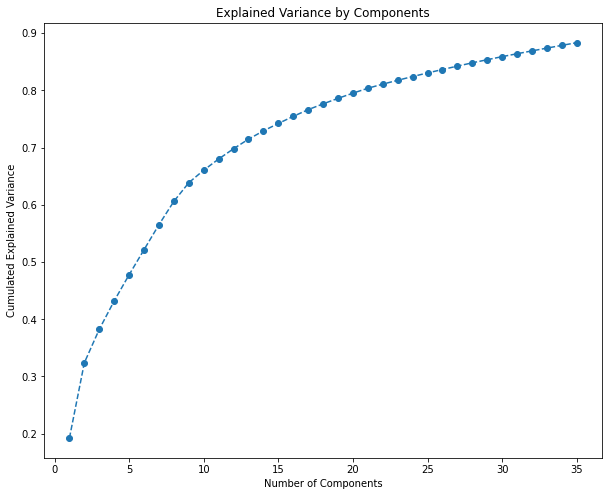

In [24]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,36), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle= '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Explained Variance")

In [25]:
#choose 35 componets based on the graph
pca = PCA(n_components = 35)

In [26]:
pca.fit(df_dummy)

PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
#pca.transform(df_dummy[:3])

In [28]:
scores_pca = pca.transform(df_dummy)
pca.transform(df_dummy)

array([[ 2.07049998, -0.05329672,  0.68555706, ..., -0.01989538,
         0.2530771 ,  0.33382627],
       [ 2.98876503,  0.14880582, -1.18132897, ..., -0.02123897,
        -0.09579241,  0.27597944],
       [ 3.36702384,  0.13266459, -0.74223378, ...,  0.05885798,
        -0.5444388 , -0.13126195],
       ...,
       [-0.07286145, -1.06558781,  0.9979062 , ...,  0.18676122,
        -0.74864792, -0.24313383],
       [-0.06452597, -1.35968889,  1.08548967, ...,  0.37983897,
        -0.1507596 , -0.10962419],
       [-0.40450695, -1.24225101,  0.36077157, ...,  0.48726807,
         0.49978163,  0.27789633]])

In [29]:
df_scores_pca = pd.DataFrame(scores_pca)
#rename column name
df_scores_pca.columns = ["component"+str(i) for i in df_scores_pca.columns]
df_scores_pca

,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13,component14,component15,component16,component17,component18,component19,component20,component21,component22,component23,component24,component25,component26,component27,component28,component29,component30,component31,component32,component33,component34
0,2.070500,-0.053297,0.685557,-0.971888,-0.559395,-0.096774,0.043840,0.382559,-2.171803,-0.915228,-0.938232,-0.182095,-0.703702,0.338174,-0.480801,-0.591183,-0.258266,-1.055867,0.557975,0.029400,-0.546187,-0.049602,-0.535889,-0.333605,0.103516,0.331055,-0.435315,0.226033,-0.472357,0.123323,0.868536,0.117472,-0.019895,0.253077,0.333826
1,2.988765,0.148806,-1.181329,-0.561322,-0.830113,-0.063350,0.002401,0.582090,-1.063320,-0.623329,-0.117945,0.725463,-0.505723,-0.230993,-0.021021,-0.134998,0.417257,-1.198257,0.397694,-0.706778,-0.263888,-0.165020,0.835967,0.049528,-0.557421,-0.457619,-0.497714,0.497393,-0.329851,-0.233958,-0.141738,-0.562983,-0.021239,-0.095792,0.275979
2,3.367024,0.132665,-0.742234,-0.486030,-0.606258,-0.038157,0.004301,0.298136,-1.101722,-0.277920,-0.211376,0.971824,-0.516043,-0.363859,0.140555,-0.158126,0.146057,-1.230456,0.467795,-0.507961,-0.344165,-0.330569,0.527067,0.485843,-0.239122,-0.600584,-0.410111,0.284531,-0.474641,-0.200653,-0.198892,-0.230040,0.058858,-0.544439,-0.131262
3,1.980102,-0.230193,0.060940,-0.925404,-0.650500,-0.139973,0.027143,0.837241,-1.655298,-0.433836,1.572106,1.211004,-0.251477,0.550142,0.230686,-0.357896,0.442948,-0.998035,0.565909,-0.512605,0.034794,-0.145507,0.537744,-0.043571,-0.414804,-0.282358,-0.052707,-0.167137,0.085081,-0.645436,-0.212950,-0.512670,0.257795,-0.068126,-0.029508
4,0.211827,-0.959710,-0.258009,-1.102757,-0.544424,-0.169976,0.033627,1.213165,-2.013621,0.146931,0.755043,0.309201,-0.827118,0.464251,-0.735557,0.019268,-0.022763,-0.809508,0.703260,1.007164,-0.324723,0.587741,0.484873,-0.131797,-0.052436,0.471869,-0.294738,-0.000846,-0.131276,-0.183737,-0.282094,-0.320759,0.244806,-0.235301,0.608482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85119,0.465277,-0.568520,0.423356,0.855201,1.118366,-0.120470,0.072775,0.295855,-1.166978,1.150070,-1.326895,-0.328104,0.402745,0.703206,0.394626,0.684657,-0.335920,0.140182,-0.989771,0.149587,-0.948535,0.538574,-0.066199,0.370288,0.685291,-0.211598,-0.415793,0.040496,0.699203,0.938275,-0.729462,-0.189257,0.453974,-0.856235,0.113839
85120,0.249392,-0.712848,-0.232681,0.870155,0.930993,-0.154080,0.043410,0.654919,-0.879949,1.086880,-1.036646,-0.424284,0.184466,0.621354,-0.002431,1.434031,-0.175660,0.244733,-0.893296,0.158996,-1.021351,0.553733,-0.316657,-0.157102,0.333062,-0.033933,-0.522917,0.142751,0.791425,0.900829,-0.863046,-0.211334,0.683775,-0.248413,0.328395
85121,-0.072861,-1.065588,0.997906,0.700996,0.748659,-0.099001,0.078382,0.239643,-1.421020,1.324301,-0.252235,0.387901,0.399684,0.611796,0.078386,0.112124,-0.323024,0.679852,-0.929515,0.420238,-0.488901,0.381338,0.162202,0.485819,0.639331,0.027423,-0.468922,-0.640575,0.459576,0.535498,-0.510276,-0.233155,0.186761,-0.748648,-0.243134
85122,-0.064526,-1.359689,1.085490,0.630202,0.213234,-0.055861,0.042843,0.114566,-1.355662,1.090024,0.026682,0.507823,-0.016110,0.077238,-0.180569,-0.230376,-0.192909,1.077819,-0.927594,0.572314,-0.353536,0.386746,-0.015556,0.337796,0.331753,0.051714,-0.419125,-0.525977,0.324779,0.435597,-0.449824,-0.279410,0.379839,-0.150760,-0.109624


KMEANS

In [30]:
from sklearn.cluster import KMeans
wcss = []
# 計算 k=1~20 的損失函數
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scores_pca)
    # kmeans.inertia_
    wcss.append(kmeans.inertia_)

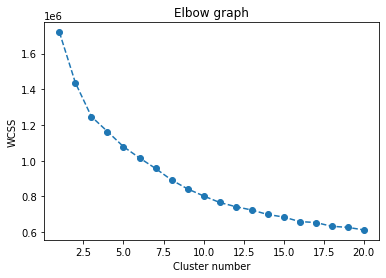

In [31]:
plt.plot(range(1,21), wcss, marker='o', linestyle= '--')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [32]:
#取10群
kmeans_pca = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
# Cust_All['clusters'] = kmeans_pca.fit_predict(Cust_All)
# print(round(pd.DataFrame(kmeans.cluster_centers_),2))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [33]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), df_scores_pca], axis =1)
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [34]:
df_segm_pca_kmeans.head()

,id,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,car_address,car_title,car_photo,dealer_name,dealer_address,sunroof,TPMS,SRS,keyless,ESP,ABS,cruise_sys,HID_head,isofix,electric_seat,auto_AC,navi_sys,IVI_sys,leather_seat,parking_radar,parking_camera,BSM,LDW,source,car_door,car_seat,theft_alarm,central_lock,TCS,LED_head,SW_button,ACC,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13,component14,component15,component16,component17,component18,component19,component20,component21,component22,component23,component24,component25,component26,component27,component28,component29,component30,component31,component32,component33,component34,Segment K-means PCA
0,236581,TOYOTA,ALTIS,2009.0,197710.0,196000.0,黑,1800.0,2.0,汽油,手自排,1,高雄市,豐田ALTIS 1800cc 2009年 黑色0頭款可全貸,https://www.hotcar.com.tw/UPLOAD/CW/HF1002/260...,上暘汽車,高雄市鳥松區神農路856號,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,HOT,nan,nan,nan,nan,nan,nan,nan,nan,2.070500,-0.053297,0.685557,-0.971888,-0.559395,-0.096774,0.043840,0.382559,-2.171803,-0.915228,-0.938232,-0.182095,-0.703702,0.338174,-0.480801,-0.591183,-0.258266,-1.055867,0.557975,0.029400,-0.546187,-0.049602,-0.535889,-0.333605,0.103516,0.331055,-0.435315,0.226033,-0.472357,0.123323,0.868536,0.117472,-0.019895,0.253077,0.333826,1
1,236578,MITSUBISHI,DELICA,2016.0,81609.0,358000.0,深藍,2400.0,2.0,汽油,手排,1,高雄市,三菱得利卡2400cc 2016年框式附加吊桿0頭款可全貸,https://www.hotcar.com.tw/UPLOAD/CW/HF1002/260...,上暘汽車,高雄市鳥松區神農路856號,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,HOT,nan,nan,nan,nan,nan,nan,nan,nan,2.988765,0.148806,-1.181329,-0.561322,-0.830113,-0.063350,0.002401,0.582090,-1.063320,-0.623329,-0.117945,0.725463,-0.505723,-0.230993,-0.021021,-0.134998,0.417257,-1.198257,0.397694,-0.706778,-0.263888,-0.165020,0.835967,0.049528,-0.557421,-0.457619,-0.497714,0.497393,-0.329851,-0.233958,-0.141738,-0.562983,-0.021239,-0.095792,0.275979,1
2,236571,SUZUKI,CARRY,2013.0,53167.0,286000.0,銀,1600.0,2.0,汽油,手排,1,高雄市,鈴木吉利 1590cc 2013年銀色0頭款可全貸,https://www.hotcar.com.tw/UPLOAD/CW/HF1002/260...,上暘汽車,高雄市鳥松區神農路856號,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,HOT,nan,nan,nan,nan,nan,nan,nan,nan,3.367024,0.132665,-0.742234,-0.486030,-0.606258,-0.038157,0.004301,0.298136,-1.101722,-0.277920,-0.211376,0.971824,-0.516043,-0.363859,0.140555,-0.158126,0.146057,-1.230456,0.467795,-0.507961,-0.344165,-0.330569,0.527067,0.485843,-0.239122,-0.600584,-0.410111,0.284531,-0.474641,-0.200653,-0.198892,-0.230040,0.058858,-0.544439,-0.131262,1
3,236495,NISSAN,MARCH,2013.0,92757.0,238000.0,淺綠,1500.0,2.0,汽油,自排,1,台中市,新手駕駛首選 顯眼 小台 好停車 好照顧,https://www.hotcar.com.tw/UPLOAD/CW/HD1076/260...,聖傑汽車(烏日店),台中市烏日區中山路三段903號,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,HOT,nan,nan,nan,nan,nan,nan,nan,nan,1.980102,-0.230193,0.060940,-0.925404,-0.650500,-0.139973,0.027143,0.837241,-1.655298,-0.433836,1.572106,1.211004,-0.251477,0.550142,0.230686,-0.357896,0.442948,-0.998035,0.565909,-0.512605,0.034794,-0.145507,0.537744,-0.043571,-0.414804,-0.282358,-0.052707,-0.167137,0.085081,-0.645436,-0.212950,-0.512670,0.257795,-0.068126,-0.029508,1
4,236493,NISSAN,SENTRA,2015.0,43307.0,378000.0,白,1800.0,2.0,汽油,手自排,1,台中市,Aero 旗艦版 電動座椅調整 4安 多合一影音,https://www.hotcar.com.tw/UPLOAD/CW/HD1076/260...,聖傑汽車(烏日店),台中市烏日區中山路三段903號,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,HOT,nan,nan,nan,nan,nan,nan,nan,nan,0.211827,-0.959710,-0.258009,-1.102757,-0.544424,-0.169976,0.033627,1.213165,-2.013621,0.146931,0.755043,0.309201,-0.827118,0.464251,-0.735557,0.019268,-0.022763,-0.809508,0.703260,1.007164,-0.324723,0.587741,0.484873,-0.131797,-0.052436,0.471869,-0.294738,-0.000846,-0.131276,-0.183737,-0.282094,-0.320759,0.244806,-0.235301,0.608482,1


In [35]:
dfdummy_segm_pca_kmeans = pd.concat([df_dummy.reset_index(drop = True), df_scores_pca], axis =1)
dfdummy_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [37]:
dfdummy_segm_pca_kmeans

,car_year,car_mileage,car_price,car_cylinderVolume,car_driveMode,car_door,car_seat,car_brand_ACURA,car_brand_ALFA ROMEO,car_brand_ALFAROMEO,car_brand_ASIA,car_brand_ASTON MARTIN,car_brand_AUDI,car_brand_AUSTIN,car_brand_BENTLEY,car_brand_BENZ,car_brand_BMW,car_brand_BUICK,car_brand_CADILLAC,car_brand_CHEVROLET,car_brand_CHRYSLER,car_brand_CITROEN,car_brand_CMC,car_brand_DAIHATSU,car_brand_DFSK,car_brand_DODGE,car_brand_FERRARI,car_brand_FIAT,car_brand_FORD,car_brand_FORMOSA,car_brand_FOTON,car_brand_HINO,car_brand_HONDA,car_brand_HUMMER,car_brand_HYUNDAI,car_brand_INFINITI,car_brand_ISUZU,car_brand_IVECO,car_brand_JAGUAR,car_brand_JEEP,...,SW_button_nan,ACC_0.0,ACC_1.0,ACC_nan,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13,component14,component15,component16,component17,component18,component19,component20,component21,component22,component23,component24,component25,component26,component27,component28,component29,component30,component31,component32,component33,component34,Segment K-means PCA
0,-0.963289,-0.000530,12.185870,-0.005802,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,2.070500,-0.053297,0.685557,-0.971888,-0.559395,-0.096774,0.043840,0.382559,-2.171803,-0.915228,-0.938232,-0.182095,-0.703702,0.338174,-0.480801,-0.591183,-0.258266,-1.055867,0.557975,0.029400,-0.546187,-0.049602,-0.535889,-0.333605,0.103516,0.331055,-0.435315,0.226033,-0.472357,0.123323,0.868536,0.117472,-0.019895,0.253077,0.333826,1
1,0.589285,-0.009547,12.788288,0.000230,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,2.988765,0.148806,-1.181329,-0.561322,-0.830113,-0.063350,0.002401,0.582090,-1.063320,-0.623329,-0.117945,0.725463,-0.505723,-0.230993,-0.021021,-0.134998,0.417257,-1.198257,0.397694,-0.706778,-0.263888,-0.165020,0.835967,0.049528,-0.557421,-0.457619,-0.497714,0.497393,-0.329851,-0.233958,-0.141738,-0.562983,-0.021239,-0.095792,0.275979,1
2,-0.076103,-0.011756,12.563747,-0.007812,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,3.367024,0.132665,-0.742234,-0.486030,-0.606258,-0.038157,0.004301,0.298136,-1.101722,-0.277920,-0.211376,0.971824,-0.516043,-0.363859,0.140555,-0.158126,0.146057,-1.230456,0.467795,-0.507961,-0.344165,-0.330569,0.527067,0.485843,-0.239122,-0.600584,-0.410111,0.284531,-0.474641,-0.200653,-0.198892,-0.230040,0.058858,-0.544439,-0.131262,1
3,-0.076103,-0.008681,12.380026,-0.008818,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1.980102,-0.230193,0.060940,-0.925404,-0.650500,-0.139973,0.027143,0.837241,-1.655298,-0.433836,1.572106,1.211004,-0.251477,0.550142,0.230686,-0.357896,0.442948,-0.998035,0.565909,-0.512605,0.034794,-0.145507,0.537744,-0.043571,-0.414804,-0.282358,-0.052707,-0.167137,0.085081,-0.645436,-0.212950,-0.512670,0.257795,-0.068126,-0.029508,1
4,0.367489,-0.012521,12.842649,-0.005802,-0.391966,0.713296,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0.211827,-0.959710,-0.258009,-1.102757,-0.544424,-0.169976,0.033627,1.213165,-2.013621,0.146931,0.755043,0.309201,-0.827118,0.464251,-0.735557,0.019268,-0.022763,-0.809508,0.703260,1.007164,-0.324723,0.587741,0.484873,-0.131797,-0.052436,0.471869,-0.294738,-0.000846,-0.131276,-0.183737,-0.282094,-0.320759,0.244806,-0.235301,0.608482,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85119,-0.519696,-0.010094,12.429216,-0.001781,-0.391966,-1.646729,-0.026059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


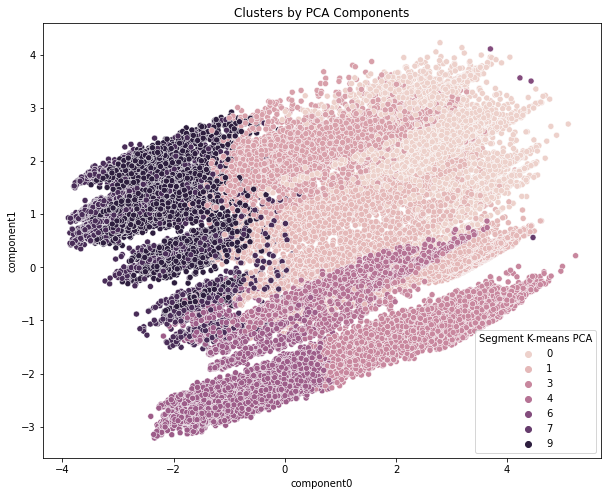

In [40]:
x_axis = df_segm_pca_kmeans['component0']
y_axis = df_segm_pca_kmeans['component1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-means PCA'] ) # ,palette=['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.title("Clusters by PCA Components")
plt.show()

In [41]:
#看各群平均價格
df_segm_pca_kmeans.groupby(['Segment K-means PCA'])['car_price'].mean()

Segment K-means PCA
0    5.535951e+05
1    4.493121e+05
2    2.819339e+05
3    3.882049e+05
4    7.616547e+05
5    7.570331e+05
6    2.722000e+05
7    4.580000e+05
8    1.477754e+06
9    8.181018e+05
Name: car_price, dtype: float64

In [42]:
#看各群平均年份
df_segm_pca_kmeans.groupby(['Segment K-means PCA'])['car_year'].mean()

Segment K-means PCA
0    2012.020595
1    2012.362072
2    2010.164720
3    2011.500192
4    2013.039090
5    2014.865441
6    2005.000000
7    2010.000000
8    2015.474220
9    2014.900785
Name: car_year, dtype: float64

In [43]:
df_segm_pca_kmeans.to_csv('car_segmentation_20210805.csv', encoding='utf_8_sig')